# 회귀(Regression)
## "주택가격 예측"
- 더미변수를 이용한 다중선형회귀(Multiple Linear Regression with Dummy Variables): StatsModel

### 수행절차    
1. 문제 정의
2. 데이터 수집
3. 데이터 탐색
4. 특성 생성
5. 모델링
6. 평가

## 1. 문제 정의
"주택의 주변 특성들에 따라 예측한 주택가격은 얼마인가?"

## 2. 데이터 수집
- Plain Text 파일을 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)에서 다운로드

In [80]:
# Pandas를 이용하여 훈련 및 검증 데이터 로드
import pandas as pd
df_train = pd.read_csv('data/bostonhousing_train.csv')
df_test = pd.read_csv('data/bostonhousing_test.csv')

## 3. 데이터 탐색

In [81]:
# 로드된 훈련 데이터 출력
df_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [82]:
# 로드된 검증 데이터 출력
df_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


### 3.1 데이터 정보 확인
### 기본정보
- 보스턴시의 1978년 주택가격

#### 타겟 데이터
- MEDV: 본인 소유의 주택가격(중앙값)(단위: $1,000) 

#### 특성 데이터
- CRIM: 자치시(Town)별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 거주지역의 비율
- INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 10ppm 당 농축 일산화질소량
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 5개의 보스턴 직업센터까지의 접근성 지수
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000 달러 당 재산세율
- PTRATIO: 자치시(Town)별 학생/교사 비율
- BLACK: 1000(Bk-0.63)^2(Bk는 자치시별 흑인 비율)
- LSTAT: 인구 중 하위계층의 비율(%)

### 3.2 데이터 구조 확인

In [83]:
print(df_train.shape) # 훈련 데이터의 행과 열
print(len(df_test)) # 검증 데이터의 행
print(df_train.info()) # 훈련(검증) 데이터의 데이터 유형

(333, 15)
173
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
CRIM       333 non-null float64
ZN         333 non-null float64
INDUS      333 non-null float64
CHAS       333 non-null int64
NOX        333 non-null float64
RM         333 non-null float64
AGE        333 non-null float64
DIS        333 non-null float64
RAD        333 non-null int64
TAX        333 non-null int64
PTRATIO    333 non-null float64
BLACK      333 non-null float64
LSTAT      333 non-null float64
MEDV       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB
None


### 3.3 Null 값 확인

In [84]:
df_train.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

- 훈련 데이터의 Null 값은 없음

In [85]:
df_test.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
dtype: int64

- 검증 데이터의 Null 값은 없음

### 3.4 기술통계량 분석

In [86]:
df_train.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


- 데이터의 *CHAS* 값은 범주형임
- 데이터의 *CHAS* 값을 제외한 모든 변수는 연속형임
- 데이터의 *TAX* 값은 상대적으로 범위가 큼
- 데이터의 *BLACK* 값은 상대적으로 범위가 큼

### 3.5 데이터 시각화를 통한 분석

In [87]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns # 고급 차트 작성을 위한 라이브러리
sns.set()

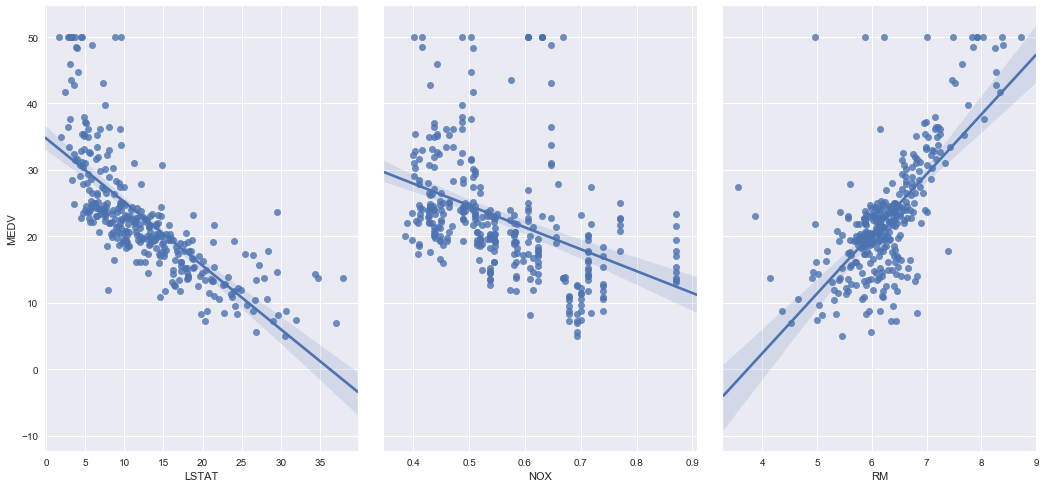

In [115]:
# 각 변수와 판매량과의 관계 파악을 위한 Pairplot
#l_cols = ['LSTAT', 'NOX', 'RM', 'MEDV']
#df_pairplot = df_train[l_cols]
#sns.pairplot(df_pairplot)
sns.pairplot(df_train, x_vars=['LSTAT', 'NOX', 'RM'], y_vars='MEDV', size=7, aspect=0.7, kind='reg')
plt.show()

## 4. 특성 구성

In [89]:
df_train_test = [df_train, df_test] # 훈련 데이터와 검증 데이터 결합

### 4.1 특성 조작(Feature Engineering)

#### 4.1.1 *TAX*

##### 4.1.1.1 파생변수 생성

In [90]:
# TAX 값으로부터 파생변수 TAX_C 값 도출
for dataset in df_train_test:
    dataset['TAX_C'] = dataset['TAX']
# BLACK 값으로부터 파생변수 BLACK_C 값 도출
for dataset in df_train_test:
    dataset['BLACK_C'] = dataset['BLACK']

##### 4.1.1.2 범주화

In [91]:
# 파생변수(TAX_C)값 입력
# Vector Map:
# - 150 이상 450 미만: 0
# - 450 이상 750 미만: 1
for dataset in df_train_test:  
    dataset.loc[(dataset['TAX_C'] >= 150) & (dataset['TAX_C'] < 330), 'TAX_C'] = 0,
    dataset.loc[(dataset['TAX_C'] >= 330) & (dataset['TAX_C'] < 750), 'TAX_C'] = 1,     

In [92]:
# 파생변수(BLACK_C)값 입력
# Vector Map:
# - 150 이상 359 미만: 0
# - 359 이상 750 미만: 1
for dataset in df_train_test:  
    dataset.loc[(dataset['BLACK_C'] >= 4) & (dataset['BLACK_C'] < 359), 'BLACK_C'] = 0,
    dataset.loc[(dataset['BLACK_C'] >= 359) & (dataset['BLACK_C'] < 497), 'BLACK_C'] = 1,     

In [93]:
df_train.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV,TAX_C,BLACK_C
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,1.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,1.0
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,1.0
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,1.0
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0,1.0


In [94]:
df_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,TAX_C,BLACK_C
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0,1.0
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,0,1.0
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,0,1.0
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,0,1.0
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,0,1.0


### 4.2 특성 및 타겟 분리

In [95]:
# 불필요 변수 제외
l_features_drop = ['MEDV', 'ID']

In [96]:
# 훈련 데이터의 특성과 레이블 분리
df_train_feature = df_train.drop(l_features_drop, axis=1)
#df_train_feature = df_train.iloc[:,[2, 3, 4]]
df_train_label = df_train['MEDV']
#df_train_label = df_train.iloc[:,[5]]

In [97]:
print(df_train_feature.shape)
print(df_train_feature.head())

(333, 15)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   

    BLACK  LSTAT  TAX_C  BLACK_C  
0  396.90   4.98      0      1.0  
1  396.90   9.14      0      1.0  
2  394.63   2.94      0      1.0  
3  396.90   5.33      0      1.0  
4  395.60  12.43      0      1.0  


In [98]:
print(df_train_label.shape)
print(df_train_label.head())

(333,)
0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
Name: MEDV, dtype: float64


In [99]:
# 불필요 변수 제외
l_features_drop = ['ID']

In [100]:
# 검증 데이터의 특성과 레이블 분리
df_test_feature = df_train.drop(l_features_drop, axis=1)
#df_test_feature = df_train.iloc[:,[3, ,4 ,5, 6, 7, 8, 9, 10, 11, 12, 13]]
#df_test_label = df_train['MEDV']
#df_test_label = df_train.iloc[:,[3]]

### 4.3 훈련과 검증 데이터 분할

In [101]:
#X_train, X_test, y_train, y_test = train_test_split(df_train_feature, df_train_label, test_size=0.3, random_state=1)
X_train = df_train_feature
X_test = df_test_feature
y_train = df_train_label
# y_test = df_test_label

In [112]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,TAX_C,BLACK_C
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0,1.0
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0,1.0
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0,1.0
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,0,1.0


In [103]:
print(X_train.head()) # 훈련 데이터의 특성 값 확인
print(len(X_train)) # 훈련 데이터의 특성 갯수 확인
print(X_test.head()) # 검증 데이터의 특성 값 확인
print(len(X_test)) # 검증 데이터의 특성 갯수 확인
print(y_train.head()) # 훈련 데이터의 레이블 값 확인
print(len(y_train)) # 훈련 데이터의 레이블 갯수 확인
#print(y_test.head()) # 검증 데이터의 레이블 값 확인
#print(len(y_test)) # 검증 데이터의 레이블 갯수 확인

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   

    BLACK  LSTAT  TAX_C  BLACK_C  
0  396.90   4.98      0      1.0  
1  396.90   9.14      0      1.0  
2  394.63   2.94      0      1.0  
3  396.90   5.33      0      1.0  
4  395.60  12.43      0      1.0  
333
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  2

## 5. 모델링

In [104]:
# 모델링을 위한 라이브러리
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

### 5.1 모델 생성 및 훈련

In [105]:
# 다중선형회귀(Multiple Linear Regression): StatsModel
reg_mlrd_sm = sm.ols(formula = 'MEDV ~ CRIM+ZN+INDUS+C(CHAS)+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+BLACK+LSTAT+C(TAX_C)+C(BLACK_C)', data = df_train).fit()

### 5.2 예측

In [106]:
y_pred_mlrd_sm = reg_mlrd_sm.predict(X_test)
y_pred_mlrd_sm.head()

0    28.912200
1    24.446663
2    28.907720
3    28.093477
4    21.487654
dtype: float64

## 6. 평가

In [107]:
# 절편(Intercept)과 회귀계수(Coefficient) 출력
reg_mlrd_sm.params

Intercept             32.493608
C(CHAS)[T.1]           3.715135
C(TAX_C)[T.1]          1.566952
C(BLACK_C)[T.1.0]     -2.338293
C(BLACK_C)[T.3.5]      1.655825
C(BLACK_C)[T.3.65]    -1.867953
CRIM                  -0.039150
ZN                     0.044045
INDUS                  0.042207
NOX                  -16.977476
RM                     4.027340
AGE                   -0.005545
DIS                   -1.570668
RAD                    0.393830
TAX                   -0.019805
PTRATIO               -0.791087
BLACK                  0.019699
LSTAT                 -0.590385
dtype: float64

In [108]:
# 결정계수(R-squared) 출력
print('R-squaured:', reg_mlrd_sm.rsquared)

R-squaured: 0.7384999927122697


In [114]:
# 회귀계수(Coefficient)에 대한 P-value 출력
print('P-value:', reg_mlrd_sm.pvalues)

P-value: Intercept             1.986600e-06
C(CHAS)[T.1]          1.322437e-03
C(TAX_C)[T.1]         1.326211e-01
C(BLACK_C)[T.1.0]     5.296952e-02
C(BLACK_C)[T.3.5]     7.422912e-01
C(BLACK_C)[T.3.65]    7.126273e-01
CRIM                  4.746918e-01
ZN                    9.636088e-03
INDUS                 5.695047e-01
NOX                   6.135182e-04
RM                    7.533527e-13
AGE                   7.420882e-01
DIS                   8.423617e-09
RAD                   2.074222e-05
TAX                   1.482828e-03
PTRATIO               3.560514e-06
BLACK                 6.228644e-04
LSTAT                 3.531688e-18
dtype: float64


In [113]:
# 회귀계수(Coefficient)에 대한 신뢰구간(Confidence Interval) 출력
reg_mlrd_sm.conf_int()

,0,1
Intercept,19.299104,45.688112
C(CHAS)[T.1],1.459170,5.971099
C(TAX_C)[T.1],-0.477828,3.611732
C(BLACK_C)[T.1.0],-4.706727,0.030142
C(BLACK_C)[T.3.5],-8.243215,11.554865
C(BLACK_C)[T.3.65],-11.837088,8.101182
CRIM,-0.146774,0.068474
ZN,0.010773,0.077318
INDUS,-0.103641,0.188054
NOX,-26.630279,-7.324674


In [110]:
reg_mlrd_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     52.33
Date:                Tue, 24 Jul 2018   Prob (F-statistic):           4.90e-81
Time:                        15:25:30   Log-Likelihood:                -986.71
No. Observations:                 333   AIC:                             2009.
Df Residuals:                     315   BIC:                             2078.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.4936      6.706      4.845      0.000      19.299      45.688
C(CHAS)[T.1]           3.7151      1.147      3.240      0.001       1.459       5.971
C(TAX_C)[T.1]          1.5670      1.039      1.508      0.133      -0.478       3.612
C(BLACK_C)[T.1.0]     -2.3383      1.204     -1.942      0.053      -4.707       0.030
C(BLACK_C)[T.3.5]      1.6558      5.031      0.329      0.742      -8.243      11.555
C(BLACK_C)[T.3.65]    -1.8680      5.067     -0.369      0.713     -11.837       8.101
CRIM                  -0.0392      0.055     -0.716      0.475      -0.147       0.068
ZN                     0.0440      0.017      2.605      0.010       0.011       0.077
INDUS                  0.0422      0.074      0.569      0.570      -0.104       0.188
NOX                  -16.9775      4.906     -3.461      0.001     -26.630      -7.325
RM                     4.0273      0.539      7.478      0.000       2.968       5.087
AGE                   -0.0055      0.017     -0.329      0.742      -0.039       0.028
DIS                   -1.5707      0.265     -5.920      0.000      -2.093      -1.049
RAD                    0.3938      0.091      4.322      0.000       0.215       0.573
TAX                   -0.0198      0.006     -3.206      0.001      -0.032      -0.008
PTRATIO               -0.7911      0.168     -4.720      0.000      -1.121      -0.461
BLACK                  0.0197      0.006      3.456      0.001       0.008       0.031
LSTAT                 -0.5904      0.064     -9.249      0.000      -0.716      -0.465
==============================================================================
Omnibus:                      124.754   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.147
Skew:                           1.579   Prob(JB):                    3.73e-112
Kurtosis:                       8.198   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""